In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Necessary Libraries

In [2]:
#general utility libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit

#for reading MATLAB file
from scipy.io import loadmat

#for visualization
import matplotlib.pyplot as plt

#keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

#GPU Configuration

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(f"No. of GPUs available: {len(physical_devices)}")
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

No. of GPUs available: 1


#Importing Unroated Data

In [26]:
#loading MATLAB datasets in python
X_train = loadmat('/content/drive/MyDrive/MNIST data/mnist_training_data.mat')['training_data']
Y_train = loadmat('/content/drive/MyDrive/MNIST data/mnist_training_label.mat')['training_label']


X_test = loadmat('/content/drive/MyDrive/MNIST data/mnist_test_data.mat')['test_data']
Y_test = loadmat('/content/drive/MyDrive/MNIST data/mnist_test_label.mat')['test_label']

#Importing Rotated Data

In [27]:
X_rot_train = loadmat('/content/drive/MyDrive/MNIST data/mnist-rot_training_data.mat')['train_data']
Y_rot_train = loadmat('/content/drive/MyDrive/MNIST data/mnist-rot_training_label.mat')['train_label']


X_rot_test = loadmat('/content/drive/MyDrive/MNIST data/mnist-rot_test_data.mat')['test_data']
Y_rot_test = loadmat('/content/drive/MyDrive/MNIST data/mnist-rot_test_label.mat')['test_label']

In [28]:
print(f"Size of training data : ",X_train.shape)
print(f"Size of test data: ",X_test.shape)
print(f"Size of rotated training data: ",X_rot_train.shape)
print(f"Size of rotated test data: ",X_rot_test.shape)
print(f"SIze of rotated train label: ",Y_rot_train.shape)
print(f"Size of rotated test label: ",Y_rot_test.shape)

Size of training data :  (50000, 784)
Size of test data:  (10000, 784)
Size of rotated training data:  (12000, 28, 28)
Size of rotated test data:  (10000, 28, 28)
SIze of rotated train label:  (1, 12000)
Size of rotated test label:  (1, 10000)


#Preprocessing and Visualization of Rotated Data

In [29]:
X_rot_train = X_rot_train.reshape(12000,-1)
X_rot_test = X_rot_test.reshape(10000,-1)

In [30]:
print(X_rot_train.shape)
print(X_rot_test.shape)

(12000, 784)
(10000, 784)


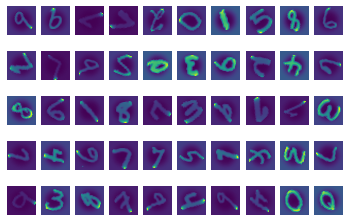

In [10]:
suffle_index=np.random.permutation(range(12000))
j=1
for i in suffle_index[:50]:
    plt.subplot(5,10,j)
    j+=1
    plt.axis('off')
    plt.imshow(X_rot_train[i].reshape(28,28))
  

In [31]:
mms = MinMaxScaler()

# Unrotated Data
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

# Rotated Data
X_rot_train = mms.fit_transform(X_rot_train)
X_rot_test = mms.transform(X_rot_test)

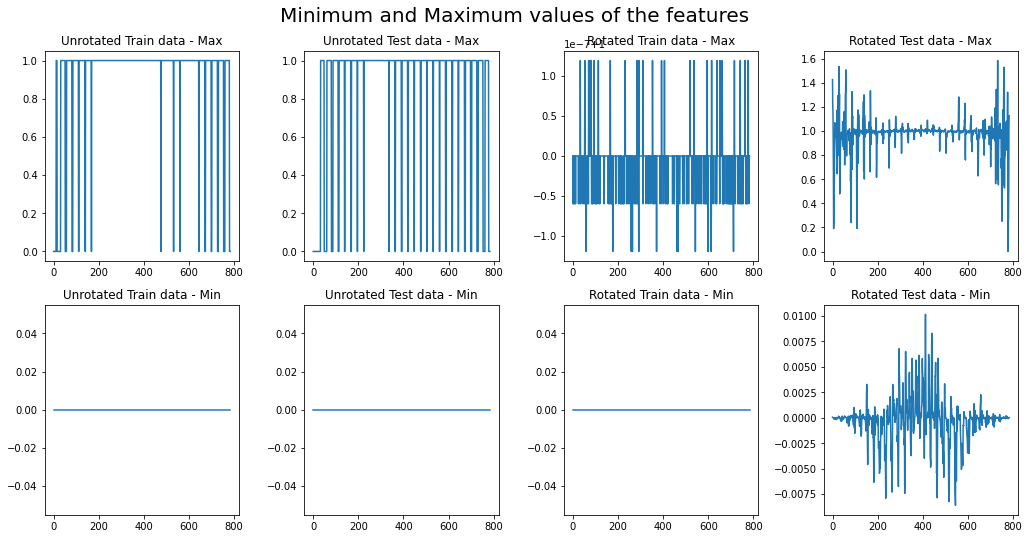

In [32]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(16, 8)
fig.patch.set_facecolor('white')
fig.suptitle('Minimum and Maximum values of the features', fontsize=20)
(urtr_max, urts_max, rotr_max, rots_max), (urtr_min, urts_min, rotr_min, rots_min) = axs

# Unrotated Train data
urtr_min.set_title('Unrotated Train data - Min')
urtr_min.plot(np.min(X_train, axis=0))
urtr_max.set_title('Unrotated Train data - Max')
urtr_max.plot(np.max(X_train, axis=0))

# Unrotated Test data
urts_min.set_title('Unrotated Test data - Min')
urts_min.plot(np.min(X_test, axis=0))
urts_max.set_title('Unrotated Test data - Max')
urts_max.plot(np.max(X_test, axis=0))

# Rotated Train data
rotr_min.set_title('Rotated Train data - Min')
rotr_min.plot(np.min(X_rot_train, axis=0))
rotr_max.set_title('Rotated Train data - Max')
rotr_max.plot(np.max(X_rot_train, axis=0))

# Rotated Test data
rots_min.set_title('Rotated Test data - Min')
rots_min.plot(np.min(X_rot_test, axis=0))
rots_max.set_title('Rotated Test data - Max')
rots_max.plot(np.max(X_rot_test, axis=0))

fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
fig.show()

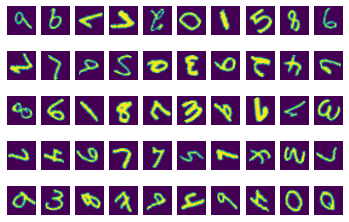

In [33]:
j=1
for i in suffle_index[:50]:
    plt.subplot(5,10,j)
    j+=1
    plt.axis('off')
    plt.imshow(X_rot_train[i].reshape(28,28))

#Combining the Rotated and Unrotated Data

In [34]:
X_train_all =np.vstack([X_train,X_rot_train])
Y_train_all=np.vstack([Y_train.reshape(-1,1),Y_rot_train.reshape(-1,1)])
X_test_all=np.vstack([X_test,X_rot_test])
Y_test_all=np.vstack([Y_test.reshape(-1,1),Y_rot_test.reshape(-1,1)])

In [35]:
print(f"Size of merged training data : ",X_train_all.shape)
print(f"Size of merged test data: ",X_test_all.shape)
print(f"Size of merged training label: ",Y_train_all.shape)
print(f"Size of merged test label: ",Y_test_all.shape)

Size of merged training data :  (62000, 784)
Size of merged test data:  (20000, 784)
Size of merged training label:  (62000, 1)
Size of merged test label:  (20000, 1)


In [36]:
# One-hot encoding using keras' numpy-related utilities
num_classes = 10
print("Shape before one-hot encoding: ", Y_train_all.shape)
Y_train_all = np_utils.to_categorical(Y_train_all, num_classes)
Y_test_all = np_utils.to_categorical(Y_test_all, num_classes)
print("Shape after one-hot encoding: ", Y_train_all.shape)

Shape before one-hot encoding:  (62000, 1)
Shape after one-hot encoding:  (62000, 10)


In [37]:
X_train_all = X_train_all.reshape(-1, 28, 28, 1)
X_test_all = X_test_all.reshape(-1, 28, 28, 1)

#Dividing the Combined Train Data into Train and Validation set

In [38]:
seed = 0
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state= seed)
train_idx, val_idx = [*sss.split(X_train_all, Y_train_all)][0]

X1_train, X_val = X_train_all[train_idx, :], X_train_all[val_idx, :]
Y1_train, Y_val = Y_train_all[train_idx, :], Y_train_all[val_idx, :]

In [39]:
Y1_train.shape

(49600, 10)

In [40]:
X1_train.shape

(49600, 28, 28, 1)

#CNN Model Used for Final Prediction in Unrotated Data

In [41]:
def create_Model():
    model = Sequential()
    model.add(Conv2D(filters = 48 ,kernel_size = (3,3), activation='relu',input_shape= (28,28,1) ))
    model.add(Conv2D(filters = 32, kernel_size = (5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(rate = 0.05))
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
    model.add(Conv2D(filters = 48, kernel_size = (5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(rate = 0.25 ))
    model.add(Flatten())
    model.add(Dense(units = 384 ,activation= 'tanh'))
    model.add(Dropout(rate = 0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(
            optimizer=keras.optimizers.Adam(learning_rate= 0.0005161743428272905),
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
    return model

Final_model = create_Model()
print(Final_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 48)        480       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        38432     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 48)          38448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 48)         

#Training the Model with Merged Data

In [21]:
n_epochs = 100
results = Final_model.fit(X1_train,Y1_train,epochs= n_epochs,validation_data=(X_val,Y_val))

Epoch 1/100
1550/1550 [==============================] - 52s 5ms/step - loss: 0.7607 - accuracy: 0.7589 - val_loss: 0.2181 - val_accuracy: 0.9311
Epoch 2/100
1550/1550 [==============================] - 7s 5ms/step - loss: 0.2111 - accuracy: 0.9331 - val_loss: 0.1474 - val_accuracy: 0.9547
Epoch 3/100
1550/1550 [==============================] - 7s 5ms/step - loss: 0.1490 - accuracy: 0.9533 - val_loss: 0.1271 - val_accuracy: 0.9611
Epoch 4/100
1550/1550 [==============================] - 8s 5ms/step - loss: 0.1186 - accuracy: 0.9625 - val_loss: 0.1119 - val_accuracy: 0.9669
Epoch 5/100
1550/1550 [==============================] - 7s 5ms/step - loss: 0.1110 - accuracy: 0.9635 - val_loss: 0.1083 - val_accuracy: 0.9686
Epoch 6/100
1550/1550 [==============================] - 7s 5ms/step - loss: 0.0946 - accuracy: 0.9689 - val_loss: 0.0971 - val_accuracy: 0.9716
Epoch 7/100
1550/1550 [==============================] - 7s 5ms/step - loss: 0.0818 - accuracy: 0.9731 - val_loss: 0.1014 - val_a

#Accuracy and Loss Plot

In [22]:
def plot_training_history(training_history, title='Training History'):
    train_loss = training_history.history['loss']
    valid_loss = training_history.history['val_loss']
    train_acc = training_history.history['accuracy']
    valid_acc = training_history.history['val_accuracy']

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    fig.set_size_inches(15, 5)

    ax1.plot(train_loss, label='Training Loss')
    ax1.plot(valid_loss, label='Validation Loss')
    ax1.set_title('Loss')
    ax1.legend()

    ax2.plot(train_acc, label='Training Accuracy')
    ax2.plot(valid_acc, label='Validation Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()

    fig.show()

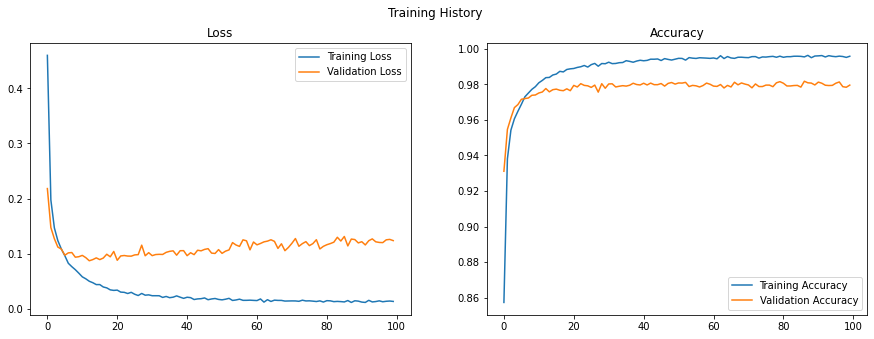

In [23]:
plot_training_history(results)

#Testing & Prediction

In [24]:
test_loss, test_accuracy = \
  Final_model.evaluate(X_test_all, Y_test_all, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.2012 - accuracy: 0.9653
Test loss: 0.2012 accuracy: 0.9653


In [42]:
predictions = Final_model.predict(X_test_all)

Actual Label : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Label : 0


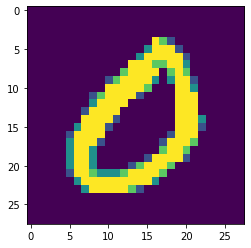

In [43]:
plt.imshow(X_test_all[690].reshape(28,28))
print('Actual Label :' ,Y_test_all[690])
print('Predicted Label :' ,np.argmax(predictions[690]))

In [45]:
#checking accuracy of first 100 predictions
first100_preds = np.argmax(predictions, axis=1)[:100]
first100_true = np.argmax(Y_test_all,axis=1)[:100]
print(first100_preds)
print(first100_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


So, we have achieved 96.5% accuracy on our test data.Also got pretty good fitting of train and validation curves even though it was overfitting slightly.We got 99.09% accuracy on our unrotated data but using merged data our accuaracy went down almost by 3%.So this loss of accuracy can be attributed to presence of rotated data.